# Домашнее задание №3 

## Часть 1. Теоретические задачи ##

### Задача №1 (10% баллов) ###

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x), b_2(x), b_3(x)$, каждый из которых ошибается с вероятностью $p$. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1, w_2, w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов: $$a_1 = \sum_{i=1}^3 w_i[b_i(x)=1]$$ Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Какова вероятность ошибки такой композиции этих трёх алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
1. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$?

** Решение **:
1) Пусть $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$. Предположим, что объект $x$ принадлежит классу 0, т.е. вероятность выбора алгоритмом 0 есть $1-p$, а вероятность совершить ошибку = выбрать 1 есть $p$. В каких случаях данная композиция совершит ошибку, т.е. выберет класс 1? Во-первых, когда все три алгоритма выберут 1. Во-вторых, когда первые два выберут 1, а третий 0 ($w_1 + w_2 > w_3$). В-третьих, когда $b_1$ и $b_3$ выберут 1, а $b_2$ выберет 0 ($w_1 + w_3 > w_2$). И, наконец, когда первый проголосует за 0, а два остальных за 1 ($w_1 < w_2 + w_3$). Теперь рассмотрены все случаи ошибок данной композиции и можно легко посчитать вероятность ошибки:
$$P = p^3 + p^2 \cdot (1-p) \cdot 3 = 3p^2 - 2p^3$$

2) Пусть $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$. По аналогии с пунктом 1 рассмотрим те случаи, когда композиция выдаст ошибку. Во-первых, когда все ри алгоритма выберут 1. Во-вторых, когда первый и третий выберут 0, а второй 1 ($w_1 + w_3 < w_2$). В-третьих, когда $b_1$ и $b_2$ выберут 1, а $b_3$ выберет 0 ($w_1 + w_2 > w_3$). И, наконец, когда второй и третий алгоритмы выберут 1, а первый выберет 0 ($w_1 < w_2 + w_3$). Теперь можем посчитать вероятность ошибки композиции: $$ P = p^3 + (1-p)^2 \cdot p + p^2 \cdot (1-p) + p^2 \cdot (1-p) = p^3 + (1-2p+p^2) \cdot p + 2p^2 - 2p^3 = p.$$

### Задача №2 (10% баллов) ###

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка [0;1], которые можно интерпретировать как вероятности принадлежности классу 1. В качестве функции потерь возьмем отрицательный логарифм правдоподобия: $$L(y,z) = -(y \cdot logz + (1-y) \cdot log(1-z))$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

** Решение: **


### Задача №3 (10% баллов) ###

Известно, что на $n$-й итерации двухклассового метода AdaBoost был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

## Часть 2. Random Forest ##

### Реализуем класс RandomForest (40%)

In [2]:
# реализуем bagging
import random

def bagging(X, y, size):
    
    sample_X = list()
    sample_y = list()
       
    # заполняем sample_X и sample_y
    while len(sample_X) < size:
        index = random.randrange(len(X))
        sample_X.append(X[index])
        sample_y.append(y[index])
    

    return sample_X, sample_y

In [3]:
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier

class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features=None, criterion='gini'):
        
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self, X_train, y_train):
        
        for item in range(self.num_trees):
            
            #генерируем случайную подвыборку с помощью bagging:
            sample_X, sample_y = bagging(X_train, y_train, y_train.shape[0])
            
            # используем дерево из библиотеки sklearn
            tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X_test):
        
        y_pred = np.zeros(X_test.shape[0])
        predictions = np.ndarray((self.num_trees, X_test.shape[0]))
        for i in range(self.num_trees):
            predictions[i] = self.trees[i].predict(X_test)
        
        #выбираем самые встречаемые классы
        for i in range(X_test.shape[0]):
            y_pred[i] = np.argmax(np.bincount(np.int64(predictions[:, i])))
        
        return y_pred

## Тестирование (15%)

Загрузим датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделим выборку на обучающую и тестовую с помощью метода train_test_split, используя значения параметров test_size=0.2, random_state=42. Попробуем обучить Random Forest на предложенном датасете

In [4]:
import pandas as pd 
from sklearn import preprocessing, model_selection

# загружаем датасет
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('''target Alcohol MalicAcid Ash AlcalinityOfAsh Magnesium TotalPhenols
           Flavanoids NonflavanoidPhenols Proanthocyanins ColorIntensity 
           Hue OD280/OD315OfDilutedWines Proline''')
df.columns = columns.split()
df.head()

,target,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315OfDilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# как обычно перекодируем данные
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
data = encoded_data.values

# делим выборку на train и test
train , test = model_selection.train_test_split(data, test_size=0.2, random_state=42)

X_test, y_test = test[:,1:], test[:,0]
X_train, y_train = train[:,1:], train[:,0]
X_test.shape

(36, 13)

Проверим точность нашего классификатора:

In [6]:
from sklearn import metrics
my_clf = RandomForest(num_trees=1)
my_clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, my_clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, my_clf.predict(X_train)))

test accuracy is  0.888888888889
train accuracy is  0.971830985915


Увеличим параметр num_trees. Пусть он теперь будет равен 5.

In [7]:
from sklearn import metrics
my_clf = RandomForest(num_trees=5)
my_clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, my_clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, my_clf.predict(X_train)))

test accuracy is  0.972222222222
train accuracy is  0.978873239437


Увеличим num_trees до 10:

In [8]:
from sklearn import metrics
my_clf = RandomForest(num_trees=10)
my_clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, my_clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, my_clf.predict(X_train)))

test accuracy is  0.972222222222
train accuracy is  0.992957746479


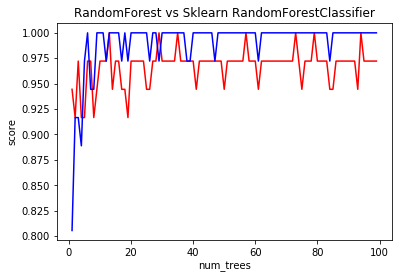

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

my_scores = []
scores = []
num_trees = 100
for i in range(1, num_trees):
    clf1 = RandomForest(num_trees=i)
    clf1.fit(X_train, y_train)
    clf2 = RandomForestClassifier(n_estimators=i)
    clf2.fit(X_train, y_train)
    my_scores.append(metrics.accuracy_score(y_test, clf1.predict(X_test)))
    scores.append(metrics.accuracy_score(y_test, clf2.predict(X_test)))
plt.xlabel("num_trees")
plt.ylabel("score")
plt.title("RandomForest vs Sklearn RandomForestClassifier")
plt.plot(range(1, num_trees), my_scores, color='red')
plt.plot(range(1, num_trees), scores, color='blue')
plt.show()

Видим, что точность при увеличении числа деревьев растёт и мы можем наблюдать следы переобучения.
Теперь сравним наш классификатор с библиотечным.

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, criterion='gini')
clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, clf.predict(X_train)))

test accuracy is  0.944444444444
train accuracy is  1.0


Cравнивая написанный RandomForest с библиотечным, видим, что наш оказался не хуже.

### Модификация Random Forest (15%)

Изменим свою реализацию RandomForest так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. 

In [15]:
class RandomForestModified(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features=None, criterion='gini'):
        
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
        self.indexes = []
    
    def fit(self, X_train, y_train):
        
        n_features = X_train.shape[1] - 1
        
        # определяем параметр self.max_features
        if (type(self.max_features) == type(int)):
            pass
        elif (type(self.max_features) == type(float)):
            self.max_features = int(self.max_features * n_features)
        elif (self.max_features == 'sqrt'):
            self.max_features = int(np.sqrt(n_features))
        elif (self.max_features == 'log2'):
            self.max_features = int(np.log2(n_features))
        else:
            self.max_features = n_features
            
        self.indexes = np.random.choice(n_features, self.max_features)
        self.indexes.sort()
        X_train = X_train[:,self.indexes]
        
        
        for item in range(self.num_trees):
            
            #генерируем случайную подвыборку с помощью bagging:
            sample_X, sample_y = bagging(X_train, y_train, y_train.shape[0])
            
            # используем дерево из библиотеки sklearn
            tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X_test):
        
        X_test = X_test[:, self.indexes]
        y_pred = np.zeros(X_test.shape[0])
        predictions = np.ndarray((self.num_trees, X_test.shape[0]))
        for i in range(self.num_trees):
            predictions[i] = self.trees[i].predict(X_test)
        
        #выбираем самые встречаемые классы
        for i in range(X_test.shape[0]):
            y_pred[i] = np.argmax(np.bincount(np.int64(predictions[:, i])))
        
        return y_pred

In [16]:
from sklearn import metrics
my_clf = RandomForestModified(num_trees=5)
my_clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, my_clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, my_clf.predict(X_train)))

test accuracy is  0.944444444444
train accuracy is  0.992957746479


In [17]:
from sklearn import metrics
my_clf = RandomForestModified(num_trees=10)
my_clf.fit(X_train, y_train)
print('test accuracy is ', metrics.accuracy_score(y_test, my_clf.predict(X_test)))
print('train accuracy is ', metrics.accuracy_score(y_train, my_clf.predict(X_train)))

test accuracy is  0.944444444444
train accuracy is  0.992957746479


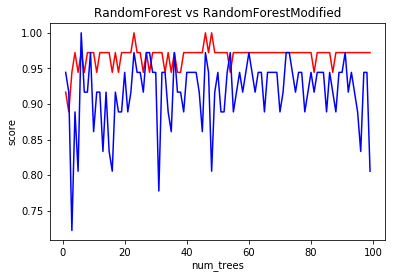

In [19]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

my_scores = []
scores = []
num_trees = 100
for i in range(1, num_trees):
    clf1 = RandomForest(num_trees=i)
    clf1.fit(X_train, y_train)
    clf2 = RandomForestModified(num_trees=i)
    clf2.fit(X_train, y_train)
    my_scores.append(metrics.accuracy_score(y_test, clf1.predict(X_test)))
    scores.append(metrics.accuracy_score(y_test, clf2.predict(X_test)))
plt.xlabel("num_trees")
plt.ylabel("score")
plt.title("RandomForest vs RandomForestModified")
plt.plot(range(1, num_trees), my_scores, color='red')
plt.plot(range(1, num_trees), scores, color='blue')
plt.show()